In [1]:
from PIL import Image
from IPython.display import display

img = Image.open('WhatsApp Image 2024-09-09 at 9.25.55 PM.jpeg')

In [ ]:
Question 1: Use any GAN (preferably DCGAN) to generate images from noise.
Step-by-Step Approach:
Step 1: Load the CIFAR-10 dataset.

Use TensorFlow/Keras or PyTorch to load the CIFAR-10 dataset and normalize the data between -1 and 1, which is required for DCGAN.
Example (using PyTorch):

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Step 2: Create the Generator and Discriminator models.

The generator creates images from random noise, and the discriminator attempts to classify real vs fake images.

import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


Step 3: Define Loss and Optimizer.

Use Binary Cross-Entropy loss and Adam optimizer for both the generator and discriminator.

criterion = nn.BCELoss()
optimizerD = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))


Step 4: Train the GAN.

For each epoch, alternate between training the discriminator and generator.
Generate a batch of fake images from random noise for training the discriminator.

num_epochs = 25

for epoch in range(num_epochs):
    for i, data in enumerate(trainloader, 0):
        # Train Discriminator with real and fake images
        discriminator.zero_grad()
        real_data, _ = data
        output = discriminator(real_data).view(-1)
        errD_real = criterion(output, torch.ones(output.size()))
        
        noise = torch.randn(batch_size, 100, 1, 1)
        fake_data = generator(noise)
        output = discriminator(fake_data.detach()).view(-1)
        errD_fake = criterion(output, torch.zeros(output.size()))
        
        errD = errD_real + errD_fake
        errD.backward()
        optimizerD.step()

        # Train Generator
        generator.zero_grad()
        output = discriminator(fake_data).view(-1)
        errG = criterion(output, torch.ones(output.size()))
        errG.backward()
        optimizerG.step()

Step 5: Plot generator and discriminator losses.

Track the loss of both models during training and plot the curves.

import matplotlib.pyplot as plt

plt.plot(g_losses, label='Generator Loss')
plt.plot(d_losses, label='Discriminator Loss')
plt.legend()
plt.show()

In [ ]:
Question 2: Fine-tune a ResNet50 model using CIFAR-10.
Step-by-Step Approach:
Step 1: Load the CIFAR-10 dataset.

Similar to Question 1, load the CIFAR-10 dataset and normalize it.
Step 2: Modify the ResNet50 model.

Use a pretrained ResNet50 model (on ImageNet) and remove the final classification layer. Add a new 2-layer neural network followed by a softmax layer.

import torchvision.models as models

resnet50 = models.resnet50(pretrained=True)
num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Linear(256, 10),  # 10 classes for CIFAR-10
    nn.Softmax(dim=1)
)

Step 3: Train the network from scratch.

Randomly initialize the weights and train the entire network on CIFAR-10.

for param in resnet50.parameters():
    param.requires_grad = True  # Train all layers

Step 4: Fine-tune ResNet50 (Frozen Layers).

Freeze the pretrained weights of the ResNet50 layers and train only the newly added layers.

for param in resnet50.parameters():
    param.requires_grad = False  # Freeze pretrained layers

for param in resnet50.fc.parameters():
    param.requires_grad = True  # Train only the new FC layers
    
    
Step 5: Fine-tune ResNet50 (Update All Layers).

This time, unfreeze all layers and update the weights during training.

for param in resnet50.parameters():
    param.requires_grad = True  # Train all layers

Step 6: Propose a domain adaptation algorithm.

Apply transfer learning or domain adaptation techniques to improve the accuracy on CIFAR-10. You can propose an approach using Maximum Mean Discrepancy (MMD) or adversarial training to align the feature distributions between ImageNet and CIFAR-10.
Example: Adversarial domain adaptation uses a domain classifier and adversarial loss to minimize domain differences.

In [ ]:
Question 3: Implement a gan from scratch using Keras to generate celebrity faces from noise using this
data-: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset.

Coding Questions
1. Data Augmentation Function for GAN Training
Write a Python function that generates augmented data for training a GAN. The function should take
an image dataset as input and apply data augmentation techniques commonly used in GAN training,
such as random rotation, flipping, and cropping. The function should return the augmented dataset.
You can use popular image-processing libraries like OpenCV or PIL to perform these augmentations.
Ensure that the function allows customization of augmentation parameters, such as rotation angles,
flip probability, and crop size.


1. Data Augmentation Function for GAN Training
In GANs, data augmentation is often used to make training data more diverse. This function applies random transformations like rotation, flipping, and cropping to the image dataset. We'll use PIL (Pillow) and NumPy for image processing.

Here’s how you can write the data augmentation function in Python:

import numpy as np
from PIL import Image, ImageOps
import random

def augment_image(image, rotation_range=30, flip_prob=0.5, crop_size=(32, 32)):
    """
    Augment image by applying random rotation, flip, and crop.

    Parameters:
    - image: A PIL image
    - rotation_range: The maximum degrees for random rotation
    - flip_prob: The probability of horizontal flip
    - crop_size: The size (width, height) of the image after cropping

    Returns:
    - Augmented image
    """
    # Random rotation
    rotation_angle = random.uniform(-rotation_range, rotation_range)
    image = image.rotate(rotation_angle)

    # Random horizontal flip
    if random.random() < flip_prob:
        image = ImageOps.mirror(image)

    # Random cropping
    width, height = image.size
    crop_x = random.randint(0, width - crop_size[0])
    crop_y = random.randint(0, height - crop_size[1])
    image = image.crop((crop_x, crop_y, crop_x + crop_size[0], crop_y + crop_size[1]))

    return image

def augment_dataset(dataset, rotation_range=30, flip_prob=0.5, crop_size=(32, 32)):
    """
    Apply augmentation to a dataset.

    Parameters:
    - dataset: List or array of PIL images
    - rotation_range: The maximum degrees for random rotation
    - flip_prob: The probability of horizontal flip
    - crop_size: The size (width, height) of the image after cropping

    Returns:
    - Augmented dataset
    """
    augmented_dataset = []
    for image in dataset:
        augmented_image = augment_image(image, rotation_range, flip_prob, crop_size)
        augmented_dataset.append(augmented_image)

    return augmented_dataset

# Example usage
# dataset = [Image.open('image_path.jpg')]  # Replace with actual images
# augmented_dataset = augment_dataset(dataset)

This function accepts the input dataset and applies rotation, flipping, and cropping augmentations to each image, returning the augmented dataset.

2.Create a simple discriminator model using tensorflow keras which can classify a image as real or
fake. You can use random noise same size as the image to train the model.

2. Simple Discriminator Model
The discriminator's role is to classify an image as either real (from the dataset) or fake (generated by the generator). Here’s how you can implement a simple discriminator using Keras:

import tensorflow as tf
from tensorflow.keras import layers, models

def build_discriminator(input_shape=(32, 32, 3)):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(64, kernel_size=3, strides=2, input_shape=input_shape, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.25))

    # Convolutional Layer 2
    model.add(layers.Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.25))

    # Flatten and Dense Layer for binary classification
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer (Real/Fake)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
discriminator = build_discriminator()
discriminator.summary()

Input Shape: A 32x32x3 image (e.g., for the CelebA dataset).
Layers: Two convolutional layers with LeakyReLU activations and dropout for regularization. The last layer is a single neuron with a sigmoid activation for binary classification (real or fake).

3.Create a generator model with uses transpose convolution to generate 32 x 32 x 3 images from
random noise. In this question you can just define the model architecture for the generator and make
sure that the model is generating the desired image size , you can take a latent space dimension as a
array of 100 float values.

3. Generator Model using Transposed Convolutions
The generator will take a random noise vector (latent space) and produce a 32x32x3 image. Transposed convolutions are commonly used to upscale the noise to the desired image size.

def build_generator(latent_dim=100):
    model = models.Sequential()

    # Dense layer
    model.add(layers.Dense(8 * 8 * 256, activation="relu", input_dim=latent_dim))
    model.add(layers.Reshape((8, 8, 256)))

    # Transposed Convolution Layer 1 (Upsample to 16x16)
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Transposed Convolution Layer 2 (Upsample to 32x32)
    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Output Layer - Final image of size 32x32x3
    model.add(layers.Conv2D(3, kernel_size=3, padding='same', activation='tanh'))

    return model

# Example usage
generator = build_generator()
generator.summary()

Latent Space: A random 100-dimensional noise vector.
Layers:
Dense layer to upscale the noise to an 8x8 feature map.
Two Conv2DTranspose layers to upscale the feature map first to 16x16, then 32x32.
The final layer outputs a 32x32x3 image using a tanh activation function, where pixel values will be in the range of [-1, 1].


In [ ]:
4. Implementing a Minimax Loss Function for GANs
Write a Python function that calculates the Minimax loss for a GAN. The function should take as input
the predictions (scores) from a discriminator and return the Minimax loss.
The Minimax loss function for GANs is typically defined as follows:

4. Implementing a Minimax Loss Function for GANs
The minimax loss function is a key concept in GANs (Generative Adversarial Networks). The function is defined as:

    Here's how to implement this loss function in Python using TensorFlow/Keras:

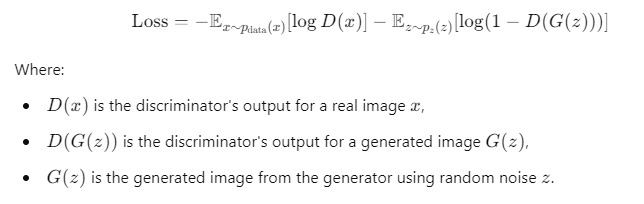

In [2]:
img

In [ ]:
import tensorflow as tf

def minimax_loss(real_output, fake_output):
    """
    Calculate the minimax loss for GAN.

    Parameters:
    - real_output: The discriminator's output for real images (D(x)).
    - fake_output: The discriminator's output for generated images (D(G(z))).

    Returns:
    - Minimax loss value.
    """
    # Loss for real images: log(D(x))
    real_loss = tf.math.reduce_mean(tf.math.log(real_output))
    
    # Loss for generated images: log(1 - D(G(z)))
    fake_loss = tf.math.reduce_mean(tf.math.log(1.0 - fake_output))
    
    # Total minimax loss
    total_loss = -real_loss - fake_loss
    
    return total_loss

# Example usage:
# Assuming real_output and fake_output are the discriminator's predictions on real and fake images
# minimax_loss(real_output, fake_output)

Explanation:
real_output: This is the discriminator's prediction when fed with real images.
fake_output: This is the discriminator's prediction when fed with generated (fake) images.
Minimax Loss: This loss function is minimized for the discriminator to classify real images as "real" and generated images as "fake."

In [ ]:
5.Use the models made in question 2,3 and make your own GAN model by connecting the generator and
the discriminator to generate images from random noise , You can use CIFAR -10 dataset. Find some
tips on creating your own GAN here :https://machinelearningmastery.com/how-to-code-generative-
adversarial-network-hacks/


5. Build a GAN Model using the Generator and Discriminator
You can now use the generator and discriminator models built in the previous questions to create a full GAN model.

Steps to build the GAN:

Generator Model: This model generates images from random noise (as defined earlier).
Discriminator Model: This model classifies images as real or fake (also defined earlier).
GAN Model: The generator and discriminator are combined, where the generator tries to fool the discriminator.
Here’s how to create a GAN model using TensorFlow/Keras:
    
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_gan(generator, discriminator):
    """
    Create and compile the GAN model.

    Parameters:
    - generator: The generator model.
    - discriminator: The discriminator model.

    Returns:
    - A compiled GAN model.
    """
    # Discriminator is not trainable while training the generator
    discriminator.trainable = False

    # GAN input: Noise vector z
    gan_input = tf.keras.Input(shape=(100,))  # Assuming latent_dim = 100
    
    # GAN output: Discriminator's decision (real or fake) for the generated image
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)

    # Create and compile the GAN model
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy')

    return gan

# Example usage:
# generator = build_generator()  # Use your generator model from Q3
# discriminator = build_discriminator()  # Use your discriminator model from Q2
# gan = build_gan(generator, discriminator)
# gan.summary()


Training the GAN:
To train the GAN model, you need to alternate between training the discriminator and generator:
    
import numpy as np

def train_gan(generator, discriminator, gan, data, epochs=10000, batch_size=64):
    """
    Train the GAN model.

    Parameters:
    - generator: The generator model.
    - discriminator: The discriminator model.
    - gan: The GAN model.
    - data: The training data (real images).
    - epochs: The number of epochs to train.
    - batch_size: The size of each batch.
    """
    for epoch in range(epochs):
        # Step 1: Train the discriminator

        # Generate random noise
        noise = np.random.normal(0, 1, (batch_size, 100))

        # Generate fake images from noise
        generated_images = generator.predict(noise)

        # Get a random set of real images
        real_images = data[np.random.randint(0, data.shape[0], batch_size)]

        # Combine real and fake images
        X = np.concatenate([real_images, generated_images])

        # Create labels: real (1) and fake (0)
        y_discriminator = np.concatenate([np.ones(batch_size), np.zeros(batch_size)])

        # Train the discriminator
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(X, y_discriminator)

        # Step 2: Train the generator

        # Generate random noise
        noise = np.random.normal(0, 1, (batch_size, 100))

        # Train the GAN (note that we're trying to trick the discriminator)
        y_gan = np.ones(batch_size)  # Generator wants the discriminator to output '1' (real)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gan)

        # Print the progress
        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

# Example usage:
# train_gan(generator, discriminator, gan, real_images_data) \


This training loop will:

Train the discriminator to differentiate between real and fake images.
Train the generator to generate realistic images that fool the discriminator.
Tips for GAN Training
Use Label Smoothing: Instead of using 0 and 1 as labels for real and fake, use values like 0.9 for real labels and 0.1 for fake labels to help the discriminator generalize better.
Learning Rate Scheduling: Adjusting the learning rate over time can help improve GAN training stability.
Batch Normalization: Batch normalization in both the generator and discriminator can help stabilize GAN training.

In [ ]:
6. Transfer Learning with GANs on the CIFAR-10 Dataset
The goal is to use a pre-trained Convolutional Neural Network (CNN) model like VGG16 or ResNet and modify it to assist in GAN-based image generation.

Step-by-Step Implementation
Step 1: Load Pre-trained CNN Model

We start by loading a pre-trained CNN model such as VGG16 or ResNet and use it for transfer learning. The fully connected layers at the end of the model are removed as we only need the feature extraction layers.

import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models

# Load pre-trained model (without top layers)
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

Step 2: Modify the Pre-trained Model

After loading the pre-trained model, we remove the fully connected layers, keeping only the feature extraction layers. We will use these extracted features to improve the GAN's ability to generate realistic images.

Step 3: Implement the Generator and Discriminator Networks

We implement the generator to generate images from random noise and the discriminator to classify real vs

fake images.

Generator Model: The generator creates images from a random latent space vector.

def build_generator():
    model = models.Sequential()

    # Latent space to dense layer
    model.add(layers.Dense(256 * 4 * 4, activation="relu", input_dim=100))
    model.add(layers.Reshape((4, 4, 256)))

    # Upsampling blocks (Transpose convolutions)
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    # Final output layer (generates 32x32x3 RGB image)
    model.add(layers.Conv2D(3, kernel_size=3, padding="same", activation="tanh"))

    return model


def build_generator():
    model = models.Sequential()

    # Latent space to dense layer
    model.add(layers.Dense(256 * 4 * 4, activation="relu", input_dim=100))
    model.add(layers.Reshape((4, 4, 256)))

    # Upsampling blocks (Transpose convolutions)
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    # Final output layer (generates 32x32x3 RGB image)
    model.add(layers.Conv2D(3, kernel_size=3, padding="same", activation="tanh"))

    return model


Discriminator Model: The discriminator uses the pre-trained VGG16/ResNet layers to classify images as real or fake.

def build_discriminator(pretrained_model):
    model = models.Sequential()

    # Use pre-trained model as feature extractor
    model.add(pretrained_model)

    # Flatten the output from pre-trained CNN
    model.add(layers.Flatten())

    # Add final classification layers
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(1, activation="sigmoid"))

    # Compile discriminator model
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

    return model

Step 4: GAN Model

We combine the generator and discriminator to form the GAN.

def build_gan(generator, discriminator):
    # Discriminator is not trainable during GAN training
    discriminator.trainable = False

    # GAN model
    gan_input = layers.Input(shape=(100,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)

    # Compile the GAN
    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss='binary_crossentropy')

    return gan

Step 5: Training the GAN

We then train the GAN model using the pre-trained CNN model (e.g., VGG16 or ResNet) as the feature extractor to improve the quality of generated images. The training process involves alternating between updating the discriminator and the generator.

def train_gan(generator, discriminator, gan, dataset, epochs=10000, batch_size=64):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train the discriminator
        real_images = dataset[np.random.randint(0, dataset.shape[0], half_batch)]
        noise = np.random.normal(0, 1, (half_batch, 100))
        generated_images = generator.predict(noise)

        # Labels
        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator via the GAN
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

# Example usage
# dataset = load_cifar10_data()  # Load CIFAR-10 dataset
# train_gan(generator, discriminator, gan, dataset)

Step 6: Evaluate the Performance

After training, generate sample images and evaluate the quality:
    
import matplotlib.pyplot as plt

def generate_images(generator, num_images=10):
    noise = np.random.normal(0, 1, (num_images, 100))
    generated_images = generator.predict(noise)

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow((generated_images[i] + 1) / 2)  # Rescale images to [0, 1]
        plt.axis('off')

    plt.show()

# Example: Generate images after training
# generate_images(generator)

In [ ]:
7. Can you create a Python function that implements a basic Generative Adversarial Network (GAN) for
generating grayscale images resembling handwritten digits (0 to 9) from the MNIST dataset? Your
function should include the generator and discriminator networks, as well as the training loop with
appropriate loss functions and optimizers. Additionally, demonstrates the generation of a few sample
images using the trained GAN model.

Step-by-step implementation of GAN:
Generator Network: Takes random noise (latent vector) and generates a synthetic image.
Discriminator Network: Classifies images as either real (from the dataset) or fake (generated by the generator).
GAN Training Loop: Alternates between training the discriminator and generator with appropriate loss functions.
Loss Functions: Binary cross-entropy is used for both generator and discriminator.
Optimizer: Adam is used for both networks.
Here's the Python code:


import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
def load_mnist_data():
    (x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    # Normalize the images to [-1, 1] and reshape
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5
    x_train = np.expand_dims(x_train, axis=-1)
    return x_train

# Generator model
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, input_dim=100))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(28 * 28 * 1, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Discriminator model
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# GAN combining both generator and discriminator
def build_gan(generator, discriminator):
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Function to display generated images
def plot_generated_images(generator, epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, [examples, 100])
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i, :, :, 0], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function to train GAN
def train_gan(generator, discriminator, gan, epochs, batch_size=128, sample_interval=200):
    x_train = load_mnist_data()
    half_batch = int(batch_size / 2)

    # Compile the discriminator
    discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

    # Compile the GAN
    gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

    # Training loop
    for epoch in range(epochs):
        # Train the discriminator with real images
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images = x_train[idx]
        real_labels = np.ones((half_batch, 1))

        # Generate fake images
        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_images = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))

        # Train discriminator (real classified as 1 and fake classified as 0)
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator (wants the discriminator to classify its images as real)
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # If at save interval => plot generated image samples
        if epoch % sample_interval == 0:
            print(f"{epoch}/{epochs} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")
            plot_generated_images(generator, epoch)

# Main function to build and train the GAN
def main():
    # Build the discriminator and generator
    generator = build_generator()
    discriminator = build_discriminator()

    # Discriminator is not trainable in GAN (only during combined training)
    discriminator.trainable = False

    # Build and compile the GAN
    gan = build_gan(generator, discriminator)

    # Train GAN
    train_gan(generator, discriminator, gan, epochs=10000, batch_size=64, sample_interval=1000)

# Run the main function
if __name__ == '__main__':
    main()
Key Components:
Generator Network:

Takes a random noise vector (latent_dim=100) and progressively transforms it into a 28x28 grayscale image.
Discriminator Network:

A simple binary classifier that takes an image (28x28x1) and outputs whether the image is real (1) or fake (0).
GAN Training Loop:

The GAN is trained in alternating steps:
The discriminator is trained on both real and generated (fake) images.
The generator is trained to fool the discriminator into classifying its generated images as real.
Training:

The model is trained over 10,000 epochs, and generated images are displayed every 1,000 epochs using the plot_generated_images function.
Requirements:
TensorFlow, Keras, and Matplotlib libraries are required.
How to Run:
Install required libraries:

pip install tensorflow matplotlib
Run the script, and it will display generated images every 1,000 epochs.
This is a basic GAN; more sophisticated GANs, such as DCGANs or Conditional GANs, can further improve results for specific tasks.

In [ ]:
8. Create a Deep Convolutional Generative Adversarial Network (DCGAN) in TensorFlow/Keras to
generate high-resolution images from low res images data set:
. Describe the
architectural choices you make and how they contribute to the model's performance)

A Deep Convolutional Generative Adversarial Network (DCGAN) extends the basic GAN architecture by using convolutional layers instead of fully connected layers, enabling the model to generate high-resolution images with better quality and detail. The key components of DCGAN are a Convolutional Generator and a Convolutional Discriminator, which exploit spatial hierarchies in images.

Architectural Choices for DCGAN:
Convolutional Generator:

Transposed Convolutions (Conv2DTranspose): In the generator, we use transposed convolutions to upsample the input noise (latent vector). This allows us to progressively create a high-resolution image from a low-dimensional noise vector.
Batch Normalization: Used to stabilize training and reduce the risk of mode collapse.
ReLU Activation: ReLU helps in non-linearity after each layer except the output layer, where a tanh activation function is used to scale output images between [-1, 1].
Convolutional Discriminator:

Convolutions (Conv2D): Standard convolutional layers are used to downsample images, capturing spatial features at different scales.
LeakyReLU Activation: LeakyReLU introduces a small gradient for negative inputs, which helps to prevent "dying ReLU" problems.
No Pooling Layers: Instead of max-pooling layers, stride convolutions are used to reduce the image size, which helps preserve spatial features.
Training Strategy:

Binary Cross-Entropy Loss: Used for both the generator and discriminator.
Adam Optimizer: With a lower learning rate and beta values (e.g., lr=0.0002 and beta_1=0.5), the Adam optimizer is better suited for GAN training as it helps the generator and discriminator learn more effectively.
DCGAN Code for High-Resolution Image Generation:

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data (low-res to high-res dataset example)
def load_data():
    # Here, we assume that a dataset of low-resolution and high-resolution images exists
    # x_train: high-resolution images for training
    # In practice, you can load your own dataset of images.
    # For demonstration, we use CIFAR-10 dataset, which can be extended to higher resolution datasets.
    (x_train, _), (_, _) = tf.keras.datasets.cifar10.load_data()
    x_train = x_train.astype(np.float32) / 127.5 - 1.0  # Normalize to [-1, 1]
    return x_train

# Generator model
def build_generator():
    model = tf.keras.Sequential()

    # Latent space vector (noise) -> dense layer to upsample
    model.add(layers.Dense(4 * 4 * 512, input_dim=100))
    model.add(layers.Reshape((4, 4, 512)))

    # First transposed convolution block (upsampling)
    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Second transposed convolution block
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Third transposed convolution block
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Final layer - output 32x32x3 image (CIFAR-10 resolution)
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='tanh'))

    return model

# Discriminator model
def build_discriminator():
    model = tf.keras.Sequential()

    # First convolution block (downsampling)
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU(alpha=0.2))

    # Second convolution block
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    # Third convolution block
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    # Flatten and output layer
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# GAN combining both generator and discriminator
def build_gan(generator, discriminator):
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Function to display generated images
def plot_generated_images(generator, epoch, examples=10, dim=(1, 10), figsize=(15, 3)):
    noise = np.random.normal(0, 1, [examples, 100])
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function to train DCGAN
def train_dcgan(generator, discriminator, gan, epochs, batch_size=128, sample_interval=200):
    x_train = load_data()
    half_batch = int(batch_size / 2)

    # Compile the discriminator
    discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

    # Compile the GAN
    gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

    # Training loop
    for epoch in range(epochs):
        # Train the discriminator with real images
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images = x_train[idx]
        real_labels = np.ones((half_batch, 1))

        # Generate fake images
        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_images = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))

        # Train discriminator (real = 1, fake = 0)
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Save and display progress
        if epoch % sample_interval == 0:
            print(f"{epoch}/{epochs} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")
            plot_generated_images(generator, epoch)

# Main function to build and train the DCGAN
def main():
    # Build the discriminator and generator
    generator = build_generator()
    discriminator = build_discriminator()

    # Discriminator is not trainable in GAN (only during combined training)
    discriminator.trainable = False

    # Build and compile the GAN
    gan = build_gan(generator, discriminator)

    # Train the DCGAN
    train_dcgan(generator, discriminator, gan, epochs=10000, batch_size=64, sample_interval=1000)

# Run the main function
if __name__ == '__main__':
    main()
Key Architectural Decisions:
Generator:

Transposed Convolutions: Used to upsample the noise vector progressively into high-resolution images.
Batch Normalization: Added after each layer to help the network converge faster and reduce training instability.
ReLU Activation: All layers except the output use ReLU for non-linearity.
Tanh Output Layer: Scales pixel values between [-1, 1] to match the real image distribution.
Discriminator:

Convolutional Layers: Standard convolutions are used to downsample and classify images as real or fake.
LeakyReLU Activation: Used to prevent dying neurons, allowing small negative gradients to flow.
Sigmoid Output: Produces a probability of the image being real or fake.
Loss and Optimizer:

Binary Cross-Entropy: The typical choice for GANs, ensuring the generator and discriminator learn to distinguish real and fake images.
Adam Optimizer: Used with a learning rate of 0.0002 and beta_1=0.5, which helps stabilize training in GANs.
Training Details:
**Epoch

In [ ]:
Create a conditional GAN which can generate images based on input condition. The data set you
would use in this case is fashion_mnist dataset from tensorflow data sets.
Reference:
https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/

A Conditional Generative Adversarial Network (cGAN) is an extension of a standard GAN where both the generator and discriminator are conditioned on additional information. In this case, we can use the Fashion MNIST dataset from TensorFlow, and the condition would be the class labels (e.g., T-shirt, trouser, pullover, etc.).

In cGAN, the generator generates images conditioned on a specific label (e.g., "trouser"), and the discriminator distinguishes between real and fake images, taking into account both the image and the corresponding label.

Architectural Choices:
Conditioned Inputs: Both the generator and discriminator are provided with the class labels as input.
Embedding Layer for Labels: We use an embedding layer to convert labels into a format that can be concatenated with the image data.
Concatenation of Labels with Noise/Image: The generator concatenates the label with the noise vector, and the discriminator concatenates the label with the image before passing it through the network.
Steps:
Generator: Takes both the noise vector and label as input and generates an image.
Discriminator: Takes both the image and label as input and predicts whether the image is real or fake.
Training: We alternately train the discriminator and generator, similar to the standard GAN training process, but with labels as additional inputs.
Code for Conditional GAN (cGAN) Using Fashion MNIST

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
def load_fashion_mnist():
    (x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
    # Normalize images to [-1, 1]
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5
    # Expand dimensions to make it (28, 28, 1)
    x_train = np.expand_dims(x_train, axis=-1)
    return x_train, y_train

# Generator model
def build_generator():
    # Label input and embedding
    label = layers.Input(shape=(1,), dtype='int32')
    label_embedding = layers.Embedding(input_dim=10, output_dim=50)(label)
    label_embedding = layers.Dense(7 * 7 * 1)(label_embedding)
    label_embedding = layers.Reshape((7, 7, 1))(label_embedding)

    # Noise input and dense layer
    noise = layers.Input(shape=(100,))
    noise_dense = layers.Dense(7 * 7 * 128)(noise)
    noise_dense = layers.Reshape((7, 7, 128))(noise_dense)

    # Concatenate noise and label embedding
    merged = layers.Concatenate()([noise_dense, label_embedding])

    # Transposed convolutional layers for image generation
    x = layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(merged)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.2)(x)

    output = layers.Conv2DTranspose(1, (7, 7), activation='tanh', padding='same')(x)

    model = models.Model([noise, label], output)
    return model

# Discriminator model
def build_discriminator():
    # Image input
    image = layers.Input(shape=(28, 28, 1))

    # Label input and embedding
    label = layers.Input(shape=(1,), dtype='int32')
    label_embedding = layers.Embedding(input_dim=10, output_dim=50)(label)
    label_embedding = layers.Dense(28 * 28 * 1)(label_embedding)
    label_embedding = layers.Reshape((28, 28, 1))(label_embedding)

    # Concatenate image and label
    merged = layers.Concatenate()([image, label_embedding])

    # Convolutional layers for classification
    x = layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same')(merged)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Flatten()(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model([image, label], output)
    return model

# GAN combining both generator and discriminator
def build_gan(generator, discriminator):
    discriminator.trainable = False
    noise, label = generator.input
    generated_image = generator.output
    gan_output = discriminator([generated_image, label])
    model = models.Model([noise, label], gan_output)
    return model

# Function to display generated images
def plot_generated_images(generator, epoch, examples=10, dim=(1, 10), figsize=(15, 3)):
    noise = np.random.normal(0, 1, (examples, 100))
    labels = np.arange(0, 10).reshape(-1, 1)
    generated_images = generator.predict([noise, labels])
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function to train cGAN
def train_cgan(generator, discriminator, gan, epochs, batch_size=128, sample_interval=200):
    x_train, y_train = load_fashion_mnist()
    half_batch = int(batch_size / 2)

    # Compile the discriminator
    discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

    # Compile the GAN
    gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

    # Training loop
    for epoch in range(epochs):
        # Train the discriminator with real images
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images, real_labels = x_train[idx], y_train[idx]
        real_labels = real_labels.reshape(-1, 1)
        real_targets = np.ones((half_batch, 1))

        # Generate fake images
        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_labels = np.random.randint(0, 10, half_batch).reshape(-1, 1)
        fake_images = generator.predict([noise, fake_labels])
        fake_targets = np.zeros((half_batch, 1))

        # Train discriminator
        d_loss_real = discriminator.train_on_batch([real_images, real_labels], real_targets)
        d_loss_fake = discriminator.train_on_batch([fake_images, fake_labels], fake_targets)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        sampled_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch([noise, sampled_labels], valid_labels)

        # Save and display progress
        if epoch % sample_interval == 0:
            print(f"{epoch}/{epochs} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")
            plot_generated_images(generator, epoch)

# Main function to build and train the cGAN
def main():
    # Build the discriminator and generator
    generator = build_generator()
    discriminator = build_discriminator()

    # Build and compile the GAN
    gan = build_gan(generator, discriminator)

    # Train the cGAN
    train_cgan(generator, discriminator, gan, epochs=10000, batch_size=64, sample_interval=1000)

# Run the main function
if __name__ == '__main__':
    main()
Explanation of the Architecture:
Generator:

Noise Vector: Randomly sampled latent space vector of size 100.
Label Embedding: Labels are converted into embeddings (size 50), reshaped, and concatenated with the noise.
Transposed Convolutions: These upsample the combined input to generate a 28x28 image.
Tanh Output Layer: The output is a grayscale image with pixel values between [-1, 1].
Discriminator:

Image Input: Receives the image (real or fake) for classification.
Label Embedding: Labels are embedded, reshaped, and concatenated with the image.
Convolutional Layers: Standard convolutions downsample the image-label pair, followed by a binary classification (real/fake).
Training Process:

Discriminator: Trained to distinguish between real and fake images, considering both the image and label.
Generator: Trained to generate convincing fake images conditioned on a label.
By combining labels with noise in the generator and with images in the discriminator, the cGAN learns to generate images based on the given label (e.g., generating shoes or T-shirts based on input conditions).